In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from IPython.display import display, Image

# Introduction to Shortest Path and Pathfinding
### Designed by Eric Ianni

### Prerequisites
* Knowledge of how to use a Jupyter Notebook
* Knowledge of basic Python and the use of multi-dimensional arrays
* Knowledge of basic weighted graphs

### Let's Paint a Picture!

Imagine you are a playing a turn-based computer game where you have a limited number of movement points per turn. Your task is to start at the village in the top left and make it to the chest in the castle as quickly as possible without moving diagonally.

<img src="images/castle_map.png" align="right"/>

To you, as a human, it is very easy to see that the only clear path is around the North of the castle, back down the East and across the bridges in the South.  You are able to process the entire map at once and quickly identify dead ends.

To a computer this task isn't that easy. Computers are limited in how much of the "big picture" they can see and have to approach problems in single steps at a time. 

Now imagine you are told that it is possible to cross water tiles, but there is a movement penalty. All of a sudden the task isn't so easy as you have to consider if swimming the moat is faster than the long way. Still, you can probably figure out that crossing the one water tile to the South-West is probably the fastest route.

Now imagine it is possible to climb the castle walls, but with a stiff movement penalty. Can you still confidently say for sure you know the fastest path without sitting down and doing the math for multiple different routes?

In this latest scenario you find yourself approaching the problem how a computer  does!

### Welcome to Pathfinding!

In this module you will learn about how computers solve the _Shortest Path Problem_ by using different _Pathfinding_ algorithms. We will begin by examining real world problems that require a shortest path. Next, we will learn to frame those problems as _graphs_ so we can apply different algorithms. Finally, we will examine these algorithms and how each approach the problem differently. 

### Learning Objectives

* Define the _Shortest Path Problem_ and give examples
* Describe _Depth First Search_ and _Breadth First Search_ while citing the differences and the required data structures
* Describe Dijkstra's algorithm and implement
* Describe the A* algorithm and implement

## What is Pathfinding?
The simplest definition of _pathfinding_ is finding a route (_path_) between points A and B. We do this all the time everyday of our lives. When driving to the store we have to pick which streets to follow to get there. Even the simple act of crossing a room is an act of selecting a route, even more so if you have children leaving toys on the ground!

While you or I use our eyes and intuition for many _pathfinding_ tasks, computers must rely on other approaches. Most computational _pathfinding_ makes heavy use of _graph theory_. This involves defining the given situation as a _graph_: a series of nodes and edges. 

To demonstrate this process, let's imagine a bus-network between a few cities: New York City, Boston, Washington D.C., Columbus, and Chicago. To represent the network, we begin by designating each city a _vertex_ in the graph. We then create an _edge_ between vertices to mirror the bus-routes. Finally we can assign the number of miles between the cities as the edge _weights_.

![City Graph](./images/city_graph.png)

That's it! Nearly anything that can be represented as relationships between objects can be turned into a graph. Now that we have learned how to frame a problem in a way for computers to understand, it is time to actually find a path.

## Introducing Twiddle Dee and Twiddle Dumb

The first two algorithms we are going to examine are _Depth First Search_ (DFS) and _Breadth First Search_ (BFS). These two methods are what I would call _dumb_ in that they are brute force approaches to the problem of _pathfinding_. 

They get their name from how they search through _tree graphs_. _DFS_ searches down a single branch until it reaches a leaf before it backtracks. _BFS_, on the other hand, searches each child node before moving onto lower levels of the tree.  

![DFS vs. BFS in Binary Trees](./images/binary_tree_search.png)(image borrowed from http://mishadoff.com/blog/dfs-on-binary-tree-array/)

When not being used for _pathfinding_, _DFS_ and _BFS_ return a list of nodes in the order in which they were visited/searched. Given the binary-trees above:

* DFS would return **[0,1,3,4,2,5,6]** 
* BFS would return **[0,1,2,3,4,5,6]**

## Let's see these two in action!

To demonstrate how _DFS_ and _BFS_ work we will be using the following graph.

![DFS & BFS Graph](./images/dfs_bfs_graph.png)
(Image borrowed from https://eddmann.com/posts/depth-first-search-and-breadth-first-search-in-python/)

Below you will find two code snippets that implement _DFS_ and _BFS_. You will be able to run these algorithms with different parameters to get a feel for how each search works. 

Begin by simply running the cells (ctrl-enter) and trying different values for the starting node and the goal node. Try the same values for both algorithms. 

After you have experimented, try to answer the following questions:

1. Why don't _DFS_ and _BFS_ come up with the same path?
2. Why does _BFS_ seem to be able to find shorter paths than _DFS_? (look at start: 'A' and goal: 'C')
3. Pay attention to the number of steps required, why are they different?
4. What does that mean for the value for each of these searches?

Now go have fun!

### Depth First Search Playground

In [2]:
# Code modified from https://eddmann.com/posts/depth-first-search-and-breadth-first-search-in-python/

graph = {'A': set(['B', 'C']),
         'B': set(['A', 'D', 'E']),
         'C': set(['A', 'F']),
         'D': set(['B']),
         'E': set(['B', 'F']),
         'F': set(['C', 'E'])}
            
def dfs(graph, start, goal):
    steps = 0
    stack = [(start, [start])]
    while stack:
        steps += 1
        (vertex, path) = stack.pop()
        if vertex == goal:
            return path, steps
        for next in graph[vertex] - set(path):
            stack.append((next, path + [next]))

def run_dfs(start, goal):
    path, steps = dfs(graph, start, goal)
    print("Path: " + str(path))
    print("Steps: " + str(steps))

interact(run_dfs, start=['A','B','C','D','E','F'], goal=['A','B','C','D','E','F'])


interactive(children=(Dropdown(description=u'start', options=('A', 'B', 'C', 'D', 'E', 'F'), value='A'), Dropdâ€¦

<function __main__.run_dfs>

### Breath First Search Playground

In [3]:
# Code modified from https://eddmann.com/posts/depth-first-search-and-breadth-first-search-in-python/

graph = {'A': set(['B', 'C']),
         'B': set(['A', 'D', 'E']),
         'C': set(['A', 'F']),
         'D': set(['B']),
         'E': set(['B', 'F']),
         'F': set(['C', 'E'])}

def bfs(graph, start, goal):
    steps = 0
    queue = [(start, [start])]
    while queue:
        steps += 1
        (vertex, path) = queue.pop(0)
        if vertex == goal:
            return path, steps
        for next in graph[vertex] - set(path):
            queue.append((next, path + [next]))

def run_bfs(start, goal):
    path, steps = bfs(graph, start, goal)
    print("Path: " + str(path))
    print("Steps: " + str(steps))

interact(run_bfs, start=['A','B','C','D','E','F'], goal=['A','B','C','D','E','F'])


interactive(children=(Dropdown(description=u'start', options=('A', 'B', 'C', 'D', 'E', 'F'), value='A'), Dropdâ€¦

<function __main__.run_bfs>

### Time to Debrief

I hope you had fun experimenting with both searches. Did you have time to answer those questions?
1. Why don't _DFS_ and _BFS_ come up with the same path?
   * _DFS_ rushes head long down a single path until it hits a dead end. _BFS_ cautiously expands the search radius little by little
   
2. Why does _BFS_ seem to be able to find shorter paths than _DFS_? (look at start: 'A' and goal: 'C')
   * _BFS's_ cautious approach means if the goal node is close by, it doesn't run past it like _DFS_ does
   
3. Pay attention to the number of steps required, why are they different?
   * If _DFS_ gets lucky and picks the correct path to pursue, it will find the goal with fewer steps, even if it is far away. _BFS_ is very efficient when finding closer goals, but if the graph has many branches and the goal is far away, the number of required steps escalates quickly!
   
4. What does that mean for the value for each of these searches?
   * With _BFS_ you are guaranteed the shortest path but you may have to examine many more nodes. With _DFS_, you are guaranteed to find _a_ path and there is no requirement to completely cover the graph, but the path isn't guaranteed to be the shortest. What search to use depends on the number of nodes to search and how important it is to have the shortest path

   
This leads nicely into our next topic!

## What is a Shortest Path Problem?
Simply put, it is any problem that requires finding the path between two points that is deemed the _shortest_. In the context of _graphs_, one path is shorter than another path when the sum of the _weights_ is smaller. Both _Directed_ and _Undirected_ graphs can be used to represent _shortest path problems_.

Let's look at an example. Below is a weighted graph and our task is to find the _shortest path_ from *A* to *F*.

![Weighted Graph 1](./images/graph1.png) 

At first glance it may look like _A->E->F_ is the answer as it only has two steps, but it has a total weight of 12.

![Weighted Graph 1 AEF](./images/graph1AEF.png)

The actual _shortest path_ is A->B->D->C->E->F. While it takes a whopping 5 steps(!), but it has a total weight of 11.

![Weighted Graph 1 ABDCEF](./images/graph1ABDCEF.png)

## Shortest Paths in the Wild
There are countless examples of real life problems that require knowing the _shortest path_. 

* Navigating with Google Maps
* Routing internet traffic
* Enemy movement in a video game 

As long as the problem can be represented as a weighted graph, it can be a _shortest path problem_. In the case of driving directions, intersections can be used as nodes while the driving time between nodes can be used as the edge weight. This graph can even be manipulated in real time to represent traffic delays so that the _shortest path_ changes.

## Shortest Pathfinding Algorithms

Now we know what a _Shortest Path Problem_ is and we already learned about an algorithm, _BFS_, that is guaranteed to find the shortest path. So we are done right? Let's go home!

Sadly, _BFS_ has some pretty big issues when it comes to _pathfinding_.

* It _only_ works on non-weighted graphs. This means it will never be able to take into account things like distance between towns when mapping out directions
* It has to search every branch it comes across before it can decide on a path. Imagine Google Maps spending time investigating roads that go in the wrong direction before it finds the correct path

But there is hope! There are dozens of approaches that smarter folks than me have devised to solve these types of problems. We are going to look at just two of them in this module.

1. _Dijkstra's Algorithm_
2. _A* Algorithm_

### Dijkstra's Algorithm

As I am sure you guessed, _Dijkstra's Algorithm_ was invented by a gentleman named Edsger Dijkstra in 1956. He claims to have invented it at a café in Amsterdam in the span of 20 minutes.

The basic algorithm is:

1. Add the source node to a priority queue with a priority of 0
2. Select the node from the queue with the highest priority
3. Select the neighbor of the current node with the lowest cost to visit. To calculate this, add the cost to reach the current node from the source vertex to the cost of traveling to the neighbor
4. If this total cost is less than the known cost to reach each neighbor node, update the cost and add the neighbor to the queue with a priority of the new cost
5. Repeat steps 2-4 until you find the target node

These plain English steps can be formalized into the properly formatted algorithm below. Please note that the algorithm below has a data structure called _prev_ to help with building a path once the search is complete.

```python
def dijkstra(graph, source, target):
    create empty Priority Queue Q
    Put source into Q with priority 0
    for each vertex v in graph:
        cur_costs[v] <- INF
        prev[v] <- NULL
    while Q is not empty:
            current <- get highest priority vertex
            if current == target:
                break
            for each neighbor n of current:
                new_cost <- cur_costs[current] + graph.costs[n]
                if new_cost < cur_costs[n]:
                    cur_costs[n] <- new_cost
                    add n to Q with priority new_cost
                    prev[n] <- current
    return cur_costs, prev
```

Armed with this information I believe we are ready to try our hand at implementing Dijkstra's Algorithm on a some small maps similar to our castle example.

#### Let's Do This!
For the remainder of this module we are going to use graphs that are represented by grids. This will help us visualize _pathfinding_ a bit easier. It also makes the code more straightforward. We will be storing these maps in 2D Python lists that store different terrain types as _chars_. Below you will find a sample map along with a visual representation to make it easier to see what is going on.

```python
'''
s = source
t = target
g = grass
f = forest
h = hill
m = mountain
w = wall
'''

map_1 = [['s','g','g','f','f','g','g','f'],
         ['g','g','f','h','h','f','g','g'],
         ['f','f','h','m','h','f','h','g'],
         ['f','h','m','h','f','h','m','h'],
         ['f','h','h','f','g','g','h','m'],
         ['f','f','f','g','g','g','g','h'],
         ['g','g','g','g','h','g','g','g'],
         ['g','m','m','m','m','h','g','t']]

terrain_costs = {'g':1, 'f':2, 'h':3, 'm':6, 'w':float('inf')}

``` 
<img src="./images/small_map3.png" align="left"/>
<div style="clear: both;"></div>

So now that we have a way to represent our graphs as a map we need a way to convert this into something usable by our algorithm. So let's make a Graph _class_! What does this class need to do?

1. Parse map of chars into the cost of moving into teach type of terrain
2. Know map specifics such as height, width, source, and target
3. Provide access to this information

We will first design our map parser. It will take in a 2D Python list like the one above and convert all those _chars_ into costs of movement. It will also identify which grid squares are the source and target.

```python
# Accepts a map of chars as grid
def parse_map(self, grid):
        # Save dimensions
        self.height = len(grid)
        self.width = len(grid[0])
        
        # Set source and target in case the map doesn't specify
        self.source = [0,0]
        self.target = [len(grid)-1, len(grid[0])-1]
    
        # Build an array of same dimensions to store costs of movement (default 1)
        self.costs = [[1 for col in range(len(grid[row]))] for row in range(len(grid))]
    
        # Iterate over map of chars
        for row in range(len(self.costs)):
            for col in range(len(self.costs[0])):
                # Found the source!
                if grid[row][col] == 's':
                    self.source = [row,col]
                # Found the target!
                elif grid[row][col] =='t':
                    self.target = [row,col]
                # Look up the cost for terrain type and assign to costs grid
                else:
                    self.costs[row][col] = self.terrain_costs[grid[row][col]]
```

The rest of the functionality is straightforward so see the complete _Graph_ class below.

In [4]:
class Graph:
        
    def __init__(self, grid, terrain_costs={'g':1, 'f':2, 'h':3, 'm':6, 'w':float('inf')}):
        self.map = grid
        self.terrain_costs = terrain_costs
        self.parse_map(grid)
        
    # Accepts a map of chars as grid
    def parse_map(self, grid):
        # Save dimensions
        self.height = len(grid)
        self.width = len(grid[0])
        
        # Set source and target in case the map doesn't specify
        self.source = [0,0]
        self.target = [len(grid)-1, len(grid[0])-1]
    
        # Build an array of same dimensions to store costs of movement (default 1)
        self.costs = [[1 for col in range(len(grid[row]))] for row in range(len(grid))]
    
        # Iterate over map of chars
        for row in range(len(self.costs)):
            for col in range(len(self.costs[0])):
                # Found the source!
                if grid[row][col] == 's':
                    self.source = [row,col]
                # Found the target!
                elif grid[row][col] =='t':
                    self.target = [row,col]
                # Look up the cost for terrain type and assign to costs grid
                else:
                    self.costs[row][col] = self.terrain_costs[grid[row][col]]
    
    # Returns true if the passed loc is within the grid
    def in_bounds(self, loc):
        row, col = loc
        return 0 <= row < self.height and 0 <= col < self.width
    
    # Returns the cost of moving into the gridsquare loc
    def cost(self, loc):
        row, col = loc
        return self.costs[row][col]

#### Priority Queue
Now that we can represent our map as a graph, we need to have a way for _Dijkstra's_ algorithm to keep track of our ever expanding list of nodes that need processing. For this we need a _Priority Queue_. While there are ready-made classes available we don't need all those features and they are easy to implement. For our purposes the _Priority Queue_ needs the following features:

1. Store all the elements
2. Add elements to queue
3. Sort elements so the item with the highest priority is at the front
4. Remove the first item and return it

For our implementation we will use a simple List which we will call *Q* (get it?). When adding elements to the queue we will simply append them to the list. To ensure that the highest priority element (lowest cost to visit) is at the front we will use the built in list _sort()_ function. This sorts from lowest cost to highest cost so when using retrieving the highest priority (lowest cost) element we need to use _pop(0)_. The _empty()_ function will just check the length of the queue.

Please see the full class below.

In [5]:
class Priority_Queue():
    
    # Declare list to use for the queue
    def __init__(self):
        self.Q = []
    
    # Add item to queue and sort by priority
    def put(self, item):
        self.Q.append(item)
        self.Q.sort()
    
    # Pop off the front of the queue and return item
    def get(self):
        if not self.empty():
            item = self.Q.pop(0)
            return item
        else:
            return None
    # Returns true if the queue is empty
    def empty(self):
        return len(self.Q) == 0

#### Now for Some Utility Code

The code below will be required when we finally implement our search algorithms. The first part consists of our map data. This is followed by two lists _directions_, which will help us quickly find the neighbors for each grid square, and <i>direction_symbols</i>, which will be used for visualizing the path once we found it. Finally, we have <i>print_grid</i> which makes it easy to display any sort of 2D list, whether it is a map, cost grid, or even the final path.

In [6]:
terrain_costs = {'g':1, 'f':2, 'h':3, 'm':6, 'w':float('inf')}

map_1 = [['s','g','g','g','g','g','g','g'],
         ['g','g','g','g','g','g','g','g'],
         ['g','g','g','g','g','g','g','g'],
         ['g','g','g','g','g','g','g','g'],
         ['g','g','g','g','g','g','g','g'],
         ['g','g','g','g','g','g','g','g'],
         ['g','g','g','g','g','g','g','g'],
         ['g','g','g','g','g','g','g','t']]

map_2 = [['s','g','g','g','w','g','g','g'],
         ['g','g','g','g','w','g','g','g'],
         ['g','g','g','g','w','g','g','g'],
         ['g','g','g','g','w','g','g','g'],
         ['g','w','w','w','w','g','g','g'],
         ['g','g','g','g','g','g','g','g'],
         ['g','g','g','g','g','g','g','g'],
         ['g','g','g','g','g','g','g','t']]

map_3 = [['s','g','g','f','f','g','g','f'],
         ['g','g','f','h','h','f','g','g'],
         ['f','f','h','m','h','f','h','g'],
         ['f','h','m','h','f','h','m','h'],
         ['f','h','h','f','g','g','h','m'],
         ['f','f','f','g','g','g','g','h'],
         ['g','g','g','g','h','g','g','g'],
         ['g','m','m','m','m','h','g','t']]

map_4 = [['s','g','g','f','f','g','g','f'],
         ['g','g','f','h','h','f','g','g'],
         ['f','f','h','m','h','f','h','g'],
         ['f','h','m','h','f','h','m','h'],
         ['f','h','h','f','g','f','h','m'],
         ['f','f','f','g','g','g','g','h'],
         ['g','g','g','g','h','g','g','g'],
         ['g','m','m','m','m','h','g','t']]

map_5 = [['s','g','g','g','g','g','g','t'],
         ['g','g','g','g','g','g','g','g'],
         ['g','g','g','g','g','g','g','g'],
         ['g','g','g','g','g','g','g','g'],
         ['g','g','g','g','g','g','g','g'],
         ['g','g','g','g','g','g','g','g'],
         ['g','g','g','g','g','g','g','g'],
         ['g','g','g','g','g','g','g','g']]

maps = [map_1, map_2, map_3, map_4, map_5]
map_files = ['small_map1.png', 'small_map2.png',
             'small_map3.png', 'small_map4.png',
             'small_map5.png']

directions = [[-1, 0 ], # Up
             [ 0, -1],  # Left
             [ 1, 0 ],  # Down
             [ 0, 1 ]]  # Right

direction_symbols = ["^", # Up 
                     "<", # Left
                     "V", # Down
                     ">"] # Right

def print_grid(name, grid):
    print(name + ": ")
    for row in grid:
        print(row)
    print()

#### Writing Dijkstra's Algorithm

We are now ready to write our Python implementation of _Dijkstra_! We are going to take the formal algorithm declaration and convert it line by line into code. Please watch the video below and follow along.

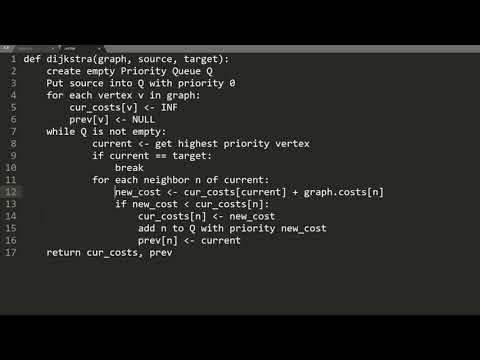

In [7]:
from IPython.display import YouTubeVideo
YouTubeVideo('oZlcg2xjhLs')

In [8]:
def dijkstra(graph):
    # Initialize Priority Queue with source
    Q = Priority_Queue()
    Q.put([0, graph.source])
    
    # Start all costs at infinity to indicate unvisted nodes
    # The cost to reach the source is set to 0
    cur_costs = [[float('inf') for col in range(graph.width)] for row in range(graph.height)]
    cur_costs[graph.source[0]][graph.source[1]] = 0
    
    # Fill prev grid with blanks so the eventual path will stand out
    prev = [[' ' for col in range(graph.width)] for row in range(graph.height)]
    
    # Keep track of the number of loops
    steps = 0
    
    # Continue while there are still nodes in the queue
    while not Q.empty():
        
        # Keep track of the number of times through the loop
        steps += 1
        
        # Get the closest node
        closest = Q.get()
        current = closest[1]
        
        # End search when reaching target
        if current == graph.target:
            return cur_costs, prev, steps

        # Loop through all the neighbors of the current node
        for i in range(len(directions)):
            n_row = current[0] + directions[i][0]
            n_col = current[1] + directions[i][1]
            
            # Verify the neighbor is INSIDE the grid
            if graph.in_bounds([n_row, n_col]):
                
                # Calculate the cost of visiting neighbor
                new_cost = cur_costs[current[0]][current[1]] + graph.cost([n_row, n_col])
                
                # If this new cost is less than what the neighbor already has stored update and add to queue
                if new_cost < cur_costs[n_row][n_col]:
                    cur_costs[n_row][n_col] = new_cost
                    Q.put([new_cost, [n_row, n_col]])
                    
                    # Store direction needed to get to the neighbor
                    prev[n_row][n_col] = i
                    
    return cur_costs, prev, steps

#### One Last Thing!
So we now have a complete search algorithm! The last step is to visualize the path from the _source_ to the _target_. We will need one more function <i>build_path</i>. Remember that in the search algorithm we produced a 2D list called _prev_ in which we stored the direction that was used to move into each grid square. 

Our function, <i>build_path</i>, starts at the _target_ and works backwards, updating the _path_ grid with the symbols corresponding to the the stored directions in _prev_. It does this until it reaches the _source_ node.

See the full <i>build_path</i> function below.

In [9]:
# Builds path by working backwards from target
def build_path(prev, source, target):
    # Create a 2D list of the same size as the map
    path = [[' ' for col in range(len(prev[row]))] for row in range(len(prev))]
    
    # Get target node
    row, col = target
    
    # Designate the target node in the path grid
    path[row][col] = '*'
    
    # Continue until reaching the source node
    while [row, col] != source:
        # Apply the stored movement direction to the current node to find next node
        new_row = row - directions[prev[row][col]][0]
        new_col = col - directions[prev[row][col]][1]
        # Insert the corresponding direction symbol to the next node
        path[new_row][new_col] = direction_symbols[prev[row][col]]
        # Update the current node
        row = new_row
        col = new_col
    return path

#### Energize!
Let's go down our pre-flight checklist.

* Graph class (**CHECK**)
* Priority Queue class (**CHECK**)
* Dijkstra Search function (**CHECK**)

We are finally ready to run our search and see some _pathfinding_! Run the code snippet below for your very first look at _Dijkstra's Algorithm_ in action!

Number of steps: 64

Path: 
['>', '>', '>', '>', '>', '>', '>', 'V']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', 'V']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', 'V']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', 'V']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', 'V']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', 'V']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', 'V']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', '*']



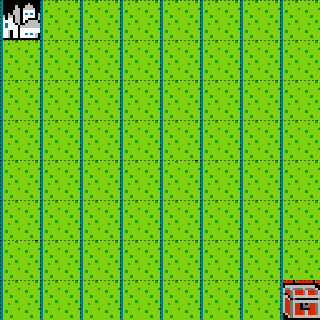

In [10]:
def run_dijkstra(map_select=1, show_path=True, show_image=True, show_cost=False):
    graph = Graph(maps[map_select - 1])
    costs, prev, steps = dijkstra(graph)
    print("Number of steps: " + str(steps))
    print()
    if show_cost:
        print_grid("Costs:", costs)
    path = build_path(prev, graph.source, graph.target)
    if show_path:
        print_grid("Path", path)
    if show_image:
        display(Image(filename='./images/' + map_files[map_select-1]))
        
run_dijkstra()

Isn't it beautiful? _Diskstra_ was able to find a path from the town to the treasure chest! And it only took 64 steps through the loop to do it!

Wait...our grid is 8x8, which means it had to visit every node in our graph! That seems very inefficient! Why do you suppose it had to visit every location before finding the optimal path?

Run the next snippet of code to examine the cost to reach each node and see if you can noodle out the answer.

Number of steps: 64

Costs:: 
[0, 1, 2, 3, 4, 5, 6, 7]
[1, 2, 3, 4, 5, 6, 7, 8]
[2, 3, 4, 5, 6, 7, 8, 9]
[3, 4, 5, 6, 7, 8, 9, 10]
[4, 5, 6, 7, 8, 9, 10, 11]
[5, 6, 7, 8, 9, 10, 11, 12]
[6, 7, 8, 9, 10, 11, 12, 13]
[7, 8, 9, 10, 11, 12, 13, 14]

Path: 
['>', '>', '>', '>', '>', '>', '>', 'V']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', 'V']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', 'V']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', 'V']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', 'V']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', 'V']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', 'V']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', '*']



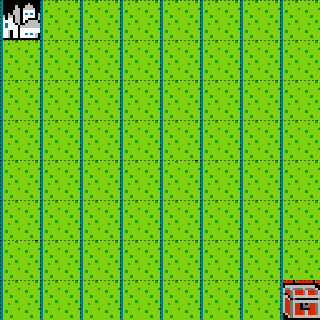

In [11]:
run_dijkstra(show_cost=True)

The answer is that _Dijkstra_ behaves the same way as _BFS_ when the graph weights are all equal. Therefore when our map is all grass, _Dijkstra_ expands out to all the closest nodes first before moving forward. This is why the cost grid shows bands of the same value from the _source_ to the _target_.

So what if we add weights? Let's run the same algorithm against the two new maps shown below. Please note the difference between the two maps indicated by the red box.

|Map 3 | Map 4|
|------|------|
|![Small map 3](./images/small_map3.png) | ![Small map 4](./images/small_map4.png)|

Before running the code snippet below, hypothesis about what will happen. Will the number of steps be the same? What do _you_ think will be the path for each just by visually looking at the maps?

You can switch back and forth between the maps using the dropdown and pick which grids you wish to see with the checkmarks.

In [12]:
interact(run_dijkstra, map_select=[3,4], show_cost=False, show_path=True, show_image=True)

interactive(children=(Dropdown(description=u'map_select', options=(3, 4), value=3), Checkbox(value=True, descrâ€¦

<function __main__.run_dijkstra>

It's OK if you thought it would take _much_ fewer than 64 steps; that was my guess too! I can you hear you saying, "But isn't _Dijkstra_ supposed to be _much_ better than _BFS_?" 

1. Remember _BFS_ **cannot** be used with weighted graphs
2. The cost for passing through each type of terrain (Mountains are 6) isn't high enough to discourage exploring most of the map

What about your prediction for how adding a forest would change the path? Did you correctly predict that it would push the path South _then_ East? Why does this happen?

1. The path for _Map 3_ passes through 4 forests and 1 hill and the rest is grass. If you exclude grass, the path cost is 4 * 2 + 1 * 3 = 11
2. Placing the new forest adds an additional cost of 2 for a total of 13
3. The path for _Map 4_ instead chooses to go through 6 forests and the rest grass. This puts the path cost at 6 * 2 = 12, which is _shorter_ than 13!

So I feel like I have let you down with how great _Dijkstra_ truly is. Up until this point I have shown a fairly mediocre search algorithm that still often requires exploring much of the map.

So we are going to do ONE more map and this time I **promise** that _Dijkstra_ will prove its worth! Let's have a look.

![Small Map 2](./images/small_map2.png)

Considering that I have given my word that this map will demonstrate _Dijkstra's_ potential, what makes _this_ map so different? Why does _this_ map not require exploring most of the map?

In [13]:
interact(run_dijkstra, map_select=fixed(2), show_cost=False, show_path=True, show_image=True)

interactive(children=(Checkbox(value=True, description=u'show_path'), Checkbox(value=True, description=u'show_â€¦

<function __main__.run_dijkstra>

If you are still unsure as to why this map is perfect for _Dijkstra_, please examine the cost grid. What do you suppose those 'inf' mean? If you guessed they were nodes that were never explored you would be correct! 

Some of them are clearly the walls, but some of them are just never visited because the total cost from the _source_ was greater than the cost to move towards the _target_. This is indicated by the 15s being the last nodes explored, as the total cost to get to the _target_ was only 14.

So that's it! You have fully implemented _Dijkstra's Algorithm_ and explored its limitations and advantages. Now we are going to finish the module by exploring a _smarter_ version of _Dijkstra_ called _A*_.

### A* Algorithm

_A*_ was developed in conjunction with trying to teach a physical robot _pathfinding_: the Shakey project. The algorithm was originally published in 1968, so over a decade after _Dijkstra_. What made it unique at the time was applying something called a _heuristic_ to help the search make better decisions when choosing which nodes to expand to next.

In many ways it is an extension of _Dijkstra's Algorithm_ and for our purposes requires very few changes to our existing implementation, so YAY!

#### What is a Heuristic?

Imagine I gave you a task to get from Corvallis, OR to NYC, NY. It would be up to you to plan the driving route using only physical maps. How would you approach this problem? You probably would look at the map and find the biggest roads that headed East and start charting your route. 

Why wouldn't you look at roads that headed West? Obviously it is because you know that NYC is East of Corvallis and it makes most sense to look in that direction first.

If you think about how _Dijkstra_ approaches the search, it has no concept of where it is ultimately trying to reach. It would explore both East and West as long as the edge weights were not drastically different: as seen in our look at _Map 3_ and _Map 4_ large step counts.

This _estimation_ of distance/direction to your _target_ is called a _heuristic_. If we know where we are starting and where we are going, we can do many things to estimate the distance. We can calculate it _as the crow flies_ or use something called _Manhattan distance_ (which we will be using) or any other way that suites our needs.

_A*_ uses this _heuristic_ to prioritize moving towards the goal over random exploring. So when deciding between two nodes with the same edge weight, _A*_ will choose the one _closer_ to the _target_.

#### Building a heuristic function

As indicated above we will be using _Manhattan distance_ for our _heuristic_ function. The name comes from the fact that Manhattan is laid out in a grid and it is not possible to travel directly from Point A to Point B as you must follow the roads.

![Manhattan Distance](./images/ManHattan_distance.svg)
(Source Wikipedia - Taxicab Geometry)

In this diagram, the green line represents the _as the crow flies_ AKA _Euclidean distance_ while the other colors are ALL _Manhattan distances_ of the same length.

To calculate a _Manhattan distance_ one must simply add the absolute change in x to the absolute change in y. That's it!

So without further ado, I present our _heuristic_ function!

In [14]:
def heuristic(a, b):
    row_1, col_1 = a
    row_2, col_2 = b
    return abs(row_1 - row_2) + abs(col_1 - col_2)

It takes in two points and returns the _Manhattan distance_. We will now use this to modify our _Dijkstra_ implementation.

#### Adding Heuristics to Dijkstra's Algorithm

_A*_ uses a _Priority Queue_ just like _Dijkstra_ when deciding which node to explore next. In _Dijkstra_, this priority is based purely on the cost to visit a given node based on the edge path from the _source_. 

In _A*_ the priority assigned to a given node in the _Priority Queue_ is a combination of the cost to visit _plus_ the distance from the _target_. In this way nodes that move away from the _target_ are penalized with a higher _cost_ in the queue, which lowers their priority.

To convert our _Dijkstra_ implementation to _A*_ we must only add

`heuristic(graph.target, [n_row, n_col])` 

to 

`Q.put([new_cost, [n_row, n_col]])`

Resulting in:

```python
Q.put([new_cost + heuristic(graph.target, [n_row, n_col]), [n_row, n_col]])
```

Please see the new (really just one line) _A*_ implementation below.

In [15]:
def a_star(graph):
    # Initialize Priority Queue with source
    Q = Priority_Queue()
    Q.put([0, graph.source])
    
    # Start all costs at infinity to indicate unvisted nodes
    # The cost to reach the source is set to 0
    cur_costs = [[float('inf') for col in range(graph.width)] for row in range(graph.height)]
    cur_costs[graph.source[0]][graph.source[1]] = 0
    
    # Fill prev grid with blanks so the eventual path will stand out
    prev = [[' ' for col in range(graph.width)] for row in range(graph.height)]
    
    # Keep track of the number of loops
    steps = 0
    
    # Continue while there are still nodes in the queue
    while not Q.empty():
        steps += 1
        
        # Get the closest node
        closest = Q.get()
        current = closest[1]
        
        # End search when reaching target
        if current == graph.target:
            return cur_costs, prev, steps

        # Loop through all the neighbors of the current node
        for i in range(len(directions)):
            n_row = current[0] + directions[i][0]
            n_col = current[1] + directions[i][1]
            
            # Verify the neighbor is INSIDE the grid
            if graph.in_bounds([n_row, n_col]):
                
                # Calculate the cost of visiting neighbor
                new_cost = cur_costs[current[0]][current[1]] + graph.cost([n_row, n_col])
                
                # If this new cost is less than what the neighbor already has stored update and add to queue
                if new_cost < cur_costs[n_row][n_col]:
                    cur_costs[n_row][n_col] = new_cost
                    
                    # THIS IS THE UPDATED LINE WITH HEURISTIC
                    Q.put([new_cost + heuristic(graph.target, [n_row, n_col]), [n_row, n_col]])
                    
                    # Store direction needed to get to the neighbor
                    prev[n_row][n_col] = i
                    
    return cur_costs, prev, steps

#### Engergize! Again...

We are now ready to run our very first _A*_ _pathfinding_ search! We are going to start with the same grassy map we did with _Dijkstra_. To refresh your memory the results took 64 steps (the max). 

How do you think the _heuristic_ function will effect the number of steps? Let's find out!

Number of steps: 64

Costs:: 
[0, 1, 2, 3, 4, 5, 6, 7]
[1, 2, 3, 4, 5, 6, 7, 8]
[2, 3, 4, 5, 6, 7, 8, 9]
[3, 4, 5, 6, 7, 8, 9, 10]
[4, 5, 6, 7, 8, 9, 10, 11]
[5, 6, 7, 8, 9, 10, 11, 12]
[6, 7, 8, 9, 10, 11, 12, 13]
[7, 8, 9, 10, 11, 12, 13, 14]

Path: 
['>', '>', '>', '>', '>', '>', '>', 'V']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', 'V']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', 'V']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', 'V']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', 'V']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', 'V']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', 'V']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', '*']



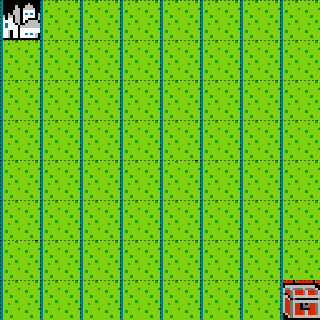

In [16]:
def run_a_star(map_select=1, show_path=True, show_image=True, show_cost=False):
    graph = Graph(maps[map_select - 1])
    costs, prev, steps = a_star(graph)
    print("Number of steps: " + str(steps))
    print()
    if show_cost:
        print_grid("Costs:", costs)
    path = build_path(prev, graph.source, graph.target)
    if show_path:
        print_grid("Path", path)
    if show_image:
        display(Image(filename='./images/' + map_files[map_select-1]))
    
run_a_star(show_cost=True)

Well, that was disappointing to say the least. Isn't _A*_ supposed to be able to find a path in fewer steps? So what happened?

To answer this question we need to examine the cost grid displayed above. What do you notice? It is exactly the same as with _Dijkstra_. 

The problem with this map is that the _target_ is the same _Manhattan distance_ from the _source_ no matter if you go East then South or South then East. Therefore  no path jumps out as being better in the absence of any obstacles.

If we were to move the _target_ so there is a _shorter_ path, we can see how _A*_ outperforms _Dijkstra_.

![Small Map 5](./images/small_map5.png)

First, let's run _Dijkstra_

Number of steps: 29

Costs:: 
[0, 1, 2, 3, 4, 5, 6, 7]
[1, 2, 3, 4, 5, 6, 7, inf]
[2, 3, 4, 5, 6, 7, inf, inf]
[3, 4, 5, 6, 7, inf, inf, inf]
[4, 5, 6, 7, inf, inf, inf, inf]
[5, 6, 7, inf, inf, inf, inf, inf]
[6, 7, inf, inf, inf, inf, inf, inf]
[7, inf, inf, inf, inf, inf, inf, inf]

Path: 
['>', '>', '>', '>', '>', '>', '>', '*']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']



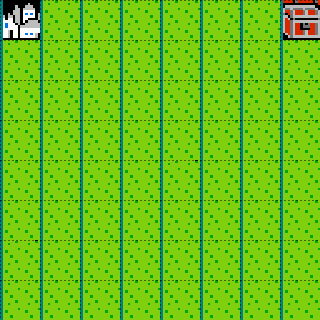

In [17]:
run_dijkstra(map_select=5, show_cost=True)

Note that _Dijkstra_ is much improved (29 steps) compared to the original 64 steps required before moving the _target_. This is because that as the wave of expansion crosses the map, the _target_ is naturally encountered earlier.

Now let's take a look at _A*_

Number of steps: 8

Costs:: 
[0, 1, 2, 3, 4, 5, 6, 7]
[1, 2, 3, 4, 5, 6, 7, inf]
[inf, inf, inf, inf, inf, inf, inf, inf]
[inf, inf, inf, inf, inf, inf, inf, inf]
[inf, inf, inf, inf, inf, inf, inf, inf]
[inf, inf, inf, inf, inf, inf, inf, inf]
[inf, inf, inf, inf, inf, inf, inf, inf]
[inf, inf, inf, inf, inf, inf, inf, inf]

Path: 
['>', '>', '>', '>', '>', '>', '>', '*']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']



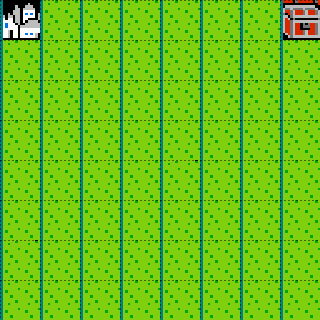

In [18]:
run_a_star(map_select=5, show_cost=True)

Huzzah! _A*_ has proven itself to be _smarter_ (only 8 steps) at finding a path than _Dijkstra_. Looking at the cost grid you should notice that moves very directly towards the _target_ and doesn't do much extra exploring.

Now let us look at the other maps and compare _A*'s_ performance to _Dijkstra's_.

First up are _Map 3_ and _Map 4_

|Map 3 | Map 4|
|------|------|
|![Small map 3](./images/small_map3.png) | ![Small map 4](./images/small_map4.png)|

_Dijkstra_ completed both of these maps in 63 steps. Now for _A*'s_ turn!

In [19]:
interact(run_a_star, map_select=[3,4], show_path=True, show_image=True, show_cost=False)

interactive(children=(Dropdown(description=u'map_select', options=(3, 4), value=3), Checkbox(value=True, descrâ€¦

<function __main__.run_a_star>

_A*_ was able to do the maps in 48 and 47 steps respectively! That is a sizable improvement for sure. Please note that the cost grid is mostly filled in. This does not mean _A*_ visited each node, but just ended up adding these to the _Priority Q_ for later visits that never happened because the _target_ was found before they were popped off. 

Now let's look at our last map, which contains the dead end; _Dijkstra_ found a path in 50 steps.

Number of steps: 41

Costs:: 
[0, 1, 2, 3, inf, inf, inf, inf]
[1, 2, 3, 4, inf, inf, inf, inf]
[2, 3, 4, 5, inf, inf, inf, inf]
[3, 4, 5, 6, inf, inf, inf, inf]
[4, inf, inf, inf, inf, 11, 12, 13]
[5, 6, 7, 8, 9, 10, 11, 12]
[6, 7, 8, 9, 10, 11, 12, 13]
[7, 8, 9, 10, 11, 12, 13, 14]

Path: 
['V', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
['V', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
['V', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
['V', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
['V', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
['>', '>', '>', '>', '>', '>', '>', 'V']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', 'V']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', '*']



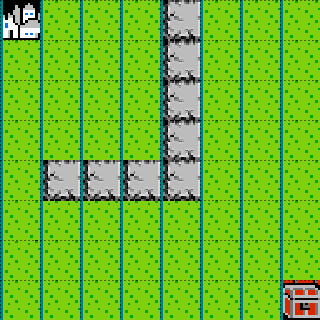

In [20]:
run_a_star(map_select=2, show_cost=True)

Take that _Dijkstra_! _A*_ only needed 41 steps! Looking at the cost grid it once again demonstrates how _A*_ is less likely to wander away from the _target_ as it explores even less of the top right of the map than _Dijkstra_.

## Conclusion
Whew! That was a lot to take in and you will likely need to review much of this notebook again. I have also provided a "playground" at the end where you will be free to experiment with changing maps, terrain weights, or even the heuristics.

But before I set you loose to further experiment let's debrief.

### What have we learned?

* _Pathfinding_ is all around us

There isn't a day that goes by that we don't utilize _pathfinding_ in our lives. When we drive a car or even make a phone call, _pathfinding_ is involved. It also usually revolves around trying to find the _shortest_ path.

* Almost anything can be turned into a _graph_

We discussed how road systems can be represented as _graphs_ using intersections as vertices and driving distance as edge weights. Try to think of your own and discuss on Piazza!

* Given a _graph_, we can search through it with multiple algorithms

We learned that _DFS_ and _BFS_ are two different approaches of searching _graphs_ without weights. We also learned that 20 minutes in a cafe in Amsterdam led to a breakthrough in _pathfinding_ algorithms. This algorithm was then later improved upon to produce _A*_ that makes the obvious decision to take into account the distance to the goal when searching.

* How to implement both _Dijkstra's_ algorithm and _A*_

We were able to break down how to turn these algorithms into functional code to solve simple grid based _pathfinding_. We did this by creating our own _Graph_ and _Priority Queue_ classes.

### Where do we go from here?

As I am sure you have come to realize, there is always more to learn. _Pathfinding_ didn't reach it's apex in 1968. Since then researchers have pushed for more sophisticated ways of _pathfinding_ that don't rely on a grid. 

One such approach has been popularized by Sebastian Thrun, who used something called SLAM (Simultaneous Localization And Mapping) to win the DARPA Grand Challenge for self-driving cars. It maps out the cars location in real time while also performing _pathfinding_ using algorithms similar to _A*_

Here is a list of some good resources if you want to further your knowledge
* [Udacity's free AI for Robotics coruse taught by Sebastian Thrun](https://www.udacity.com/course/artificial-intelligence-for-robotics--cs373)
* [An academic paper on pathfinding in video games](https://www.researchgate.net/publication/267405818_Direction_Oriented_Pathfinding_In_Video_Games)
* [A Wikipedia article about the Bellman-Ford algorithm that can be used on graphs with negative weights (something that Dijkstra cannot do)](https://en.wikipedia.org/wiki/Bellman%E2%80%93Ford_algorithm)

## Now it's time for some fun!

Below you will find two "playgrounds." One for _Dijkstra_ and one for _A*_. Feel free to change anything below this point. If you discover you have broken something you can just rerun the code snippets in the main part of the notebook to undo any changes below.

Things you should experiment with:

* Change the cost for each terrain type in the _Graph_ class
* Change the placement of the terrain and walls for any of the maps
* Change how the _heuristic_ is calculated, such as Euclidean

In [21]:
# Change the cost for a the terrain
terrain_costs = {'g':1, 'f':2, 'h':3, 'm':6, 'w':float('inf')}

In [22]:
# Try changing the layout of the maps to see how that effects things
map_1 = [['s','g','g','g','g','g','g','g'],
         ['g','g','g','g','g','g','g','g'],
         ['g','g','g','g','g','g','g','g'],
         ['g','g','g','g','g','g','g','g'],
         ['g','g','g','g','g','g','g','g'],
         ['g','g','g','g','g','g','g','g'],
         ['g','g','g','g','g','g','g','g'],
         ['g','g','g','g','g','g','g','t']]

map_2 = [['s','g','g','g','w','g','g','g'],
         ['g','g','g','g','w','g','g','g'],
         ['g','g','g','g','w','g','g','g'],
         ['g','g','g','g','w','g','g','g'],
         ['g','w','w','w','w','g','g','g'],
         ['g','g','g','g','g','g','g','g'],
         ['g','g','g','g','g','g','g','g'],
         ['g','g','g','g','g','g','g','t']]

map_3 = [['s','g','g','f','f','g','g','f'],
         ['g','g','f','h','h','f','g','g'],
         ['f','f','h','m','h','f','h','g'],
         ['f','h','m','h','f','h','m','h'],
         ['f','h','h','f','g','g','h','m'],
         ['f','f','f','g','g','g','g','h'],
         ['g','g','g','g','h','g','g','g'],
         ['g','m','m','m','m','h','g','t']]

map_4 = [['s','g','g','f','f','g','g','f'],
         ['g','g','f','h','h','f','g','g'],
         ['f','f','h','m','h','f','h','g'],
         ['f','h','m','h','f','h','m','h'],
         ['f','h','h','f','g','f','h','m'],
         ['f','f','f','g','g','g','g','h'],
         ['g','g','g','g','h','g','g','g'],
         ['g','m','m','m','m','h','g','t']]

map_5 = [['s','g','g','g','g','g','g','t'],
         ['g','g','g','g','g','g','g','g'],
         ['g','g','g','g','g','g','g','g'],
         ['g','g','g','g','g','g','g','g'],
         ['g','g','g','g','g','g','g','g'],
         ['g','g','g','g','g','g','g','g'],
         ['g','g','g','g','g','g','g','g'],
         ['g','g','g','g','g','g','g','g']]

In [23]:
# Try changing how this is calculated
def heuristic(a, b):
    row_1, col_1 = a
    row_2, col_2 = b
    return abs(row_1 - row_2) + abs(col_1 - col_2)

## Dijkstra's Playground

In [24]:
def run_dijkstra(map_select=1, show_path=True, show_image=True, show_cost=False):
    graph = Graph(maps[map_select - 1], terrain_costs)
    costs, prev, steps = dijkstra(graph)
    print("Number of steps: " + str(steps))
    print()
    if show_cost:
        print_grid("Costs:", costs)
    path = build_path(prev, graph.source, graph.target)
    if show_path:
        print_grid("Path", path)
    if show_image:
        display(Image(filename='./images/' + map_files[map_select-1]))

interact(run_dijkstra, map_select=[1,2,3,4,5], show_path=True, show_image=True, show_cost=False)

interactive(children=(Dropdown(description=u'map_select', options=(1, 2, 3, 4, 5), value=1), Checkbox(value=Trâ€¦

<function __main__.run_dijkstra>

## A*'s Playground

In [25]:
def run_a_star(map_select=1, show_path=True, show_image=True, show_cost=False):
    graph = Graph(maps[map_select - 1], terrain_costs)
    costs, prev, steps = a_star(graph)
    print("Number of steps: " + str(steps))
    print()
    if show_cost:
        print_grid("Costs:", costs)
    path = build_path(prev, graph.source, graph.target)
    if show_path:
        print_grid("Path", path)
    if show_image:
        display(Image(filename='./images/' + map_files[map_select-1]))

interact(run_a_star, map_select=[1,2,3,4,5], show_path=True, show_image=True, show_cost=False)

interactive(children=(Dropdown(description=u'map_select', options=(1, 2, 3, 4, 5), value=1), Checkbox(value=Trâ€¦

<function __main__.run_a_star>